In [141]:
#This project is based on the prediction of used cars price , using the Decision Tree Regressor,Random Forest Regressor & the XGBoost Regressor

In [142]:
#INITIALLY IMPORT ALL THE NEEDED LIBRARIES

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # To supress warnings

import scipy.stats as stats
from scipy.stats import skew
plt.style.use('ggplot')
import missingno as msno
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 

import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print("Loading The Needed Libraries Is Successfully Done")

Loading The Needed Libraries Is Successfully Done


In [144]:
#Fetching the dataframe

In [145]:
cars=pd.read_csv("D:/project/cardata.csv")
cars

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00000,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00000,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN


In [146]:
#Retrieving the top 5 index columns & it's data from the dataset

In [147]:
cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000


In [148]:
#Retrieving the last recent 5 columns & it's data from the dataset

In [149]:
cars.tail(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00000,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00000,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00000,NaN,NaN


In [150]:
#Collecting the dataset info's 

In [151]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [152]:
#Let's get the size of dataframe

In [153]:
print ("Rows     : " , cars.shape[0]) 
print ("Columns  : " , cars.shape[1]) 
print ("-"*40,"\n","Features : \n\n", cars.columns.tolist()) 
print ("-"*40,"\nMissing values :\n\n", cars.isnull().sum().sort_values(ascending=False))
print( "-"*40,"\nPercent of missing :\n\n", round(cars.isna().sum() / cars.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("-"*40,"\nUnique values :  \n\n", cars.nunique())  

Rows     :  7253
Columns  :  14
---------------------------------------- 
 Features : 

 ['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
---------------------------------------- 
Missing values :

 New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
Transmission            0
Owner_Type              0
dtype: int64
---------------------------------------- 
Percent of missing :

 S.No.                0.00000
Name                 0.00000
Location             0.00000
Year                 0.00000
Kilometers_Driven    0.00000
Fuel_Type            0.00000
Transmission         0.00000
Owner_Type           0.00000
Mileage      

In [154]:
# Making a list of all categorical variables

In [155]:
cat_col = ["Fuel_Type","Location","Transmission","Seats","Year","Owner_Type"]

In [156]:
# Printing number of count of each unique value in each column

In [157]:
for column in cat_col:
    print(cars[column].value_counts())
    print("-" * 40)

Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
----------------------------------------
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
----------------------------------------
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
----------------------------------------
Seats
5.00000     6047
7.00000      796
8.00000      170
4.00000      119
6.00000       38
2.00000       18
10.00000       8
9.00000        3
0.00000        1
Name: count, dtype: int64
----------------------------------------
Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2

In [158]:
#Visualizing the missing values from the set using missingno library

<Axes: >

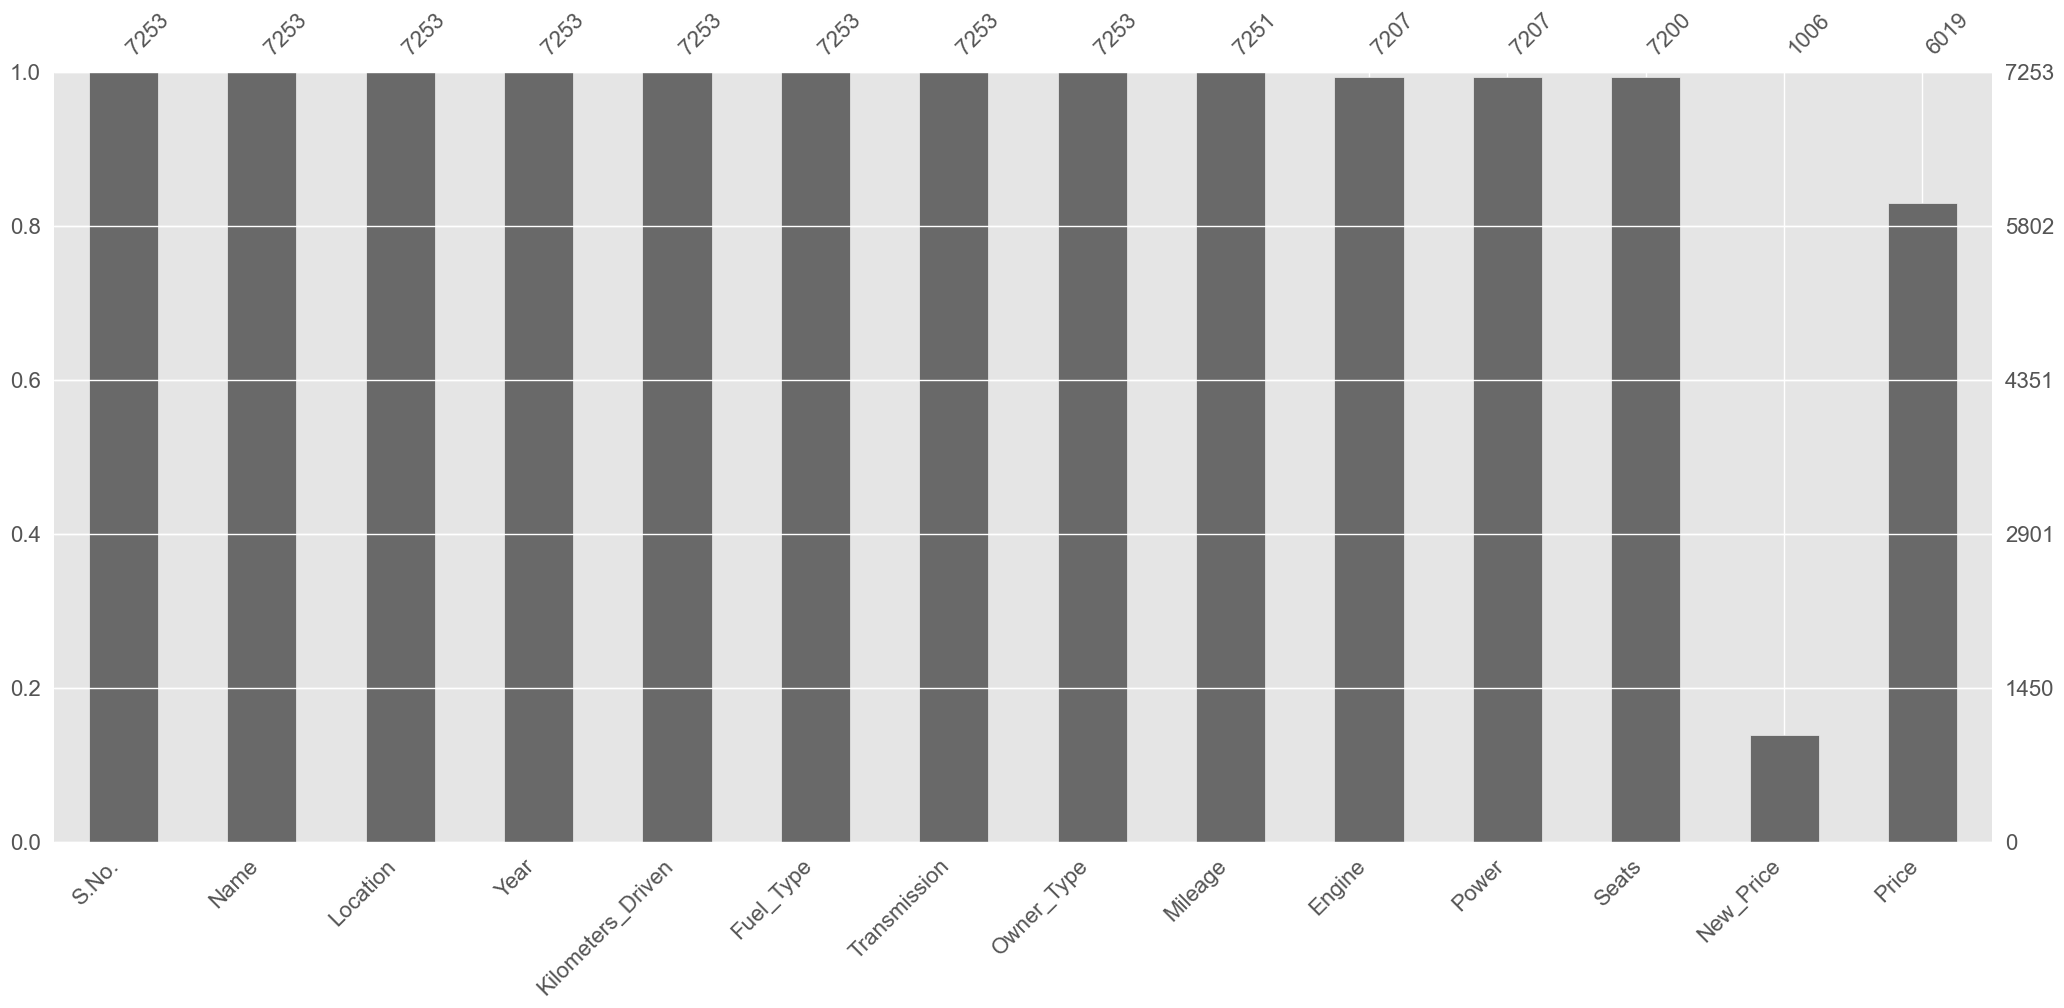

In [159]:
msno.bar(cars)

In [160]:
#DATA PREPROCESSING

In [161]:
#Random Sampling From a big population

In [162]:
cars[['Engine','Power','Mileage']].sample(5)

,Engine,Power,Mileage
4277,2143 CC,107.3 bhp,20.0 kmpl
6592,1968 CC,174.5 bhp,18.19 kmpl
3657,1197 CC,81.83 bhp,18.6 kmpl
331,1199 CC,88.7 bhp,19.0 kmpl
4093,1248 CC,88.5 bhp,26.21 kmpl


In [163]:
#remove units
cars["Engine"] = cars["Engine"].str.rstrip(" CC")
cars["Mileage"] = cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"] = cars["Mileage"].str.rstrip(" km/g")
#remove bhp and replace null with nan
cars["Power"] = cars["Power"].str.rstrip(" bhp")
cars["Power"]= cars["Power"].replace(regex="null", value = np.nan)

In [164]:
#Let's verify the data whether it is working or not
num=['Engine','Power','Mileage']
cars[num].sample(5)

,Engine,Power,Mileage
2583,1248,73.9,19.3
2214,1199,82.5,18.2
5685,1248,73.94,23.2
1993,1196,70,15.6
5459,2987,258,13.0


In [165]:
#From the different fuel types particularly taking the CNG & LPG

In [166]:
typeoffuel=['CNG','LPG']
cars.loc[cars.Fuel_Type.isin(typeoffuel)].head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00000,NaN,1.75000
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1,814,55.2,5.00000,NaN,2.35000
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6,998,58.16,5.00000,NaN,3.25000
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3,998,67.1,5.00000,NaN,1.40000
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1,1196,73,5.00000,NaN,4.70000


In [167]:
#MILEAGE
#Car Mileage value return if it is null

In [168]:
cars[cars.Mileage.isnull()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72,41,5.00000,13.58 Lakh,13.00000
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798,73,5.00000,NaN,12.75000


In [169]:
#some values in Power and Mileage as 0.0 so verifying data for Engine, Power, Mileage.

In [170]:
cars.query("Power == '0.0'")['Power'].count()

np.int64(0)

In [171]:
cars.query("Mileage == '0.0'")['Mileage'].count()

np.int64(81)

In [172]:
#Converting this observations to Nan so we will remember to handle them when handling missing values.

In [173]:
cars.loc[cars["Mileage"]=='0.0','Mileage']=np.nan
cars.loc[cars["Engine"]=='0.0','Engine'].count()

np.int64(0)

In [174]:
#Lets count the number of unique values under a particular feature

In [175]:
cars[num].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [176]:
cars[num].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [177]:
#PROCESSING ABOUT SEATS DATA

In [178]:
cars.query("Seats == 0.0")['Seats']

3999   0.00000
Name: Seats, dtype: float64

In [179]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
cars.loc[3999,'Seats'] =np.nan

In [180]:
cars.query("Seats == 0.0")['Seats']

Series([], Name: Seats, dtype: float64)

In [181]:
#PROCESSING NEW PRICE

In [182]:
# Create a new column after splitting the New_Price values.
import re
new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in cars["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing.mismatch ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.02 Cr
The data needs furthur processing.mismatch  1.4 Cr
The data needs furthur processing.mismatch  1.06 Cr
The data needs furthur processing.mismatch  1.27 Cr
The data needs furthur processing.mismatch  1.13 Cr
The data needs furthur processing.mismatch  1.36 Cr
The data needs furthur processing.mismatch  1.66 Cr
The data needs furthur processing.mismatch  1.6 Cr
The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  2.3 Cr
The data needs furthur processing.mismatch  1.71 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.58 Cr
The data needs furthur processing.mismatch  3.75 Cr
The data needs fur

In [183]:
#New price
new_price_num = []

for observation in cars["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
cars["new_price_num"] = new_price_num
# Checking the new dataframe
cars.head(3)  

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00000,NaN,1.75000,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00000,NaN,12.50000,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00000,8.61 Lakh,4.50000,8.61000


In [184]:
#FEATURE ENGINEERING - Feature engineering is the process of using domain knowledge to create new features

In [185]:
#category datatype- [ red, blue, ..., ..]
#object datatype- [ name, address,... , ..]

#converting object data type to category data type 
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")

#converting datatype  
cars["Mileage"] = cars["Mileage"].astype(float)
cars["Power"] = cars["Power"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)

In [186]:
 #Let's describe and transpose it

In [187]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.00000,3626.00000,2093.90508,0.00000,1813.00000,3626.00000,5439.00000,7252.00000
Year,7253.00000,2013.36537,3.25442,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7253.00000,58699.06315,84427.72058,171.00000,34000.00000,53416.00000,73000.00000,6500000.00000
Mileage,7170.00000,18.34653,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7207.00000,1616.57347,595.28514,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7078.00000,112.76521,53.49355,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7199.00000,5.28046,0.80933,2.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
new_price_num,1006.00000,22.77969,27.75934,3.91000,7.88500,11.57000,26.04250,375.00000


In [188]:
#Processing years to derive age of car

In [189]:
cars['Current_year']=2024
cars['Ageofcar']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,NaN,1.75000,NaN,14
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,NaN,12.50000,NaN,9
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61 Lakh,4.50000,8.61000,13


In [190]:
cars = cars.dropna(subset=['Name'])

In [191]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column as brand 
cars['Brand'] = cars['Name'].str.split(' ').str[0] #Separating Brand name from the Name
cars['Model'] = cars['Name'].str.split(' ').str[1] + cars['Name'].str.split(' ').str[2]

In [192]:
cars.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [193]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
cars[cars.Brand.isin(col)].sample(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
6367,6367,Land Rover Freelander 2 S Business Edition,Kochi,2015,61062,Diesel,Automatic,First,12.39000,2179.00000,147.51000,5.00000,NaN,NaN,NaN,9,Land,RoverFreelander
4755,4755,Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic,Hyderabad,2016,52000,Diesel,Automatic,First,15.68000,1999.00000,177.00000,5.00000,74.49 Lakh,42.00000,74.49000,8,Land,RoverRange
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,NaN,2179.00000,115.00000,5.00000,NaN,NaN,NaN,13,Land,RoverFreelander


In [194]:
#Let's again see our car info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   object  
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7170 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7078 non-null   float64 
 11  Seats              7199 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
 14  new_price_num      1006 non-null   float64 
 15  Ageofcar           7253 non-null   int64   
 16  Brand 

In [195]:
#lets change the brandnames
cars.loc[cars.Brand == 'ISUZU','Brand']='Isuzu'
cars.loc[cars.Brand=='Mini','Brand']='Mini Cooper'
cars.loc[cars.Brand=='Land','Brand']='Land Rover'

In [196]:
cars.Brand.nunique()

32

In [197]:
cars.groupby(cars.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Smart               1
dtype: int64

In [198]:
#check is there any car model name is null
cars.Model.isnull().sum()

np.int64(1)

In [199]:
#drop row with no model
cars.dropna(subset=['Model'],axis=0,inplace=True)

In [200]:
cars.Model.isnull().sum()

np.int64(0)

In [201]:
cars.Model.nunique()

726

In [202]:
cars.groupby('Model')['Model'].size().nlargest(10)

Model
SwiftDzire    189
Grandi10      179
WagonR        178
Innova2.5     145
Verna1.6      127
City1.5       122
Cityi         115
Creta1.6      110
NewC-Class    110
3Series       109
Name: Model, dtype: int64

In [203]:
#EXPLORATORY DATA ANALYSIS
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7252 non-null   int64   
 1   Name               7252 non-null   object  
 2   Location           7252 non-null   object  
 3   Year               7252 non-null   int64   
 4   Kilometers_Driven  7252 non-null   int64   
 5   Fuel_Type          7252 non-null   category
 6   Transmission       7252 non-null   category
 7   Owner_Type         7252 non-null   category
 8   Mileage            7169 non-null   float64 
 9   Engine             7206 non-null   float64 
 10  Power              7077 non-null   float64 
 11  Seats              7198 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
 14  new_price_num      1006 non-null   float64 
 15  Ageofcar           7252 non-null   int64   
 16  Brand      

In [204]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7252.00000,3625.52551,2093.65947,0.00000,1812.75000,3625.50000,5438.25000,7252.00000
Year,7252.00000,2013.36652,3.25316,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7252.00000,58700.26269,84433.48037,171.00000,34000.00000,53429.00000,73000.00000,6500000.00000
Mileage,7169.00000,18.34711,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7206.00000,1616.60505,595.32041,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7077.00000,112.76871,53.49652,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7198.00000,5.28049,0.80938,2.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
new_price_num,1006.00000,22.77969,27.75934,3.91000,7.88500,11.57000,26.04250,375.00000
Ageofcar,7252.00000,10.63348,3.25316,5.00000,8.00000,10.00000,13.00000,28.00000


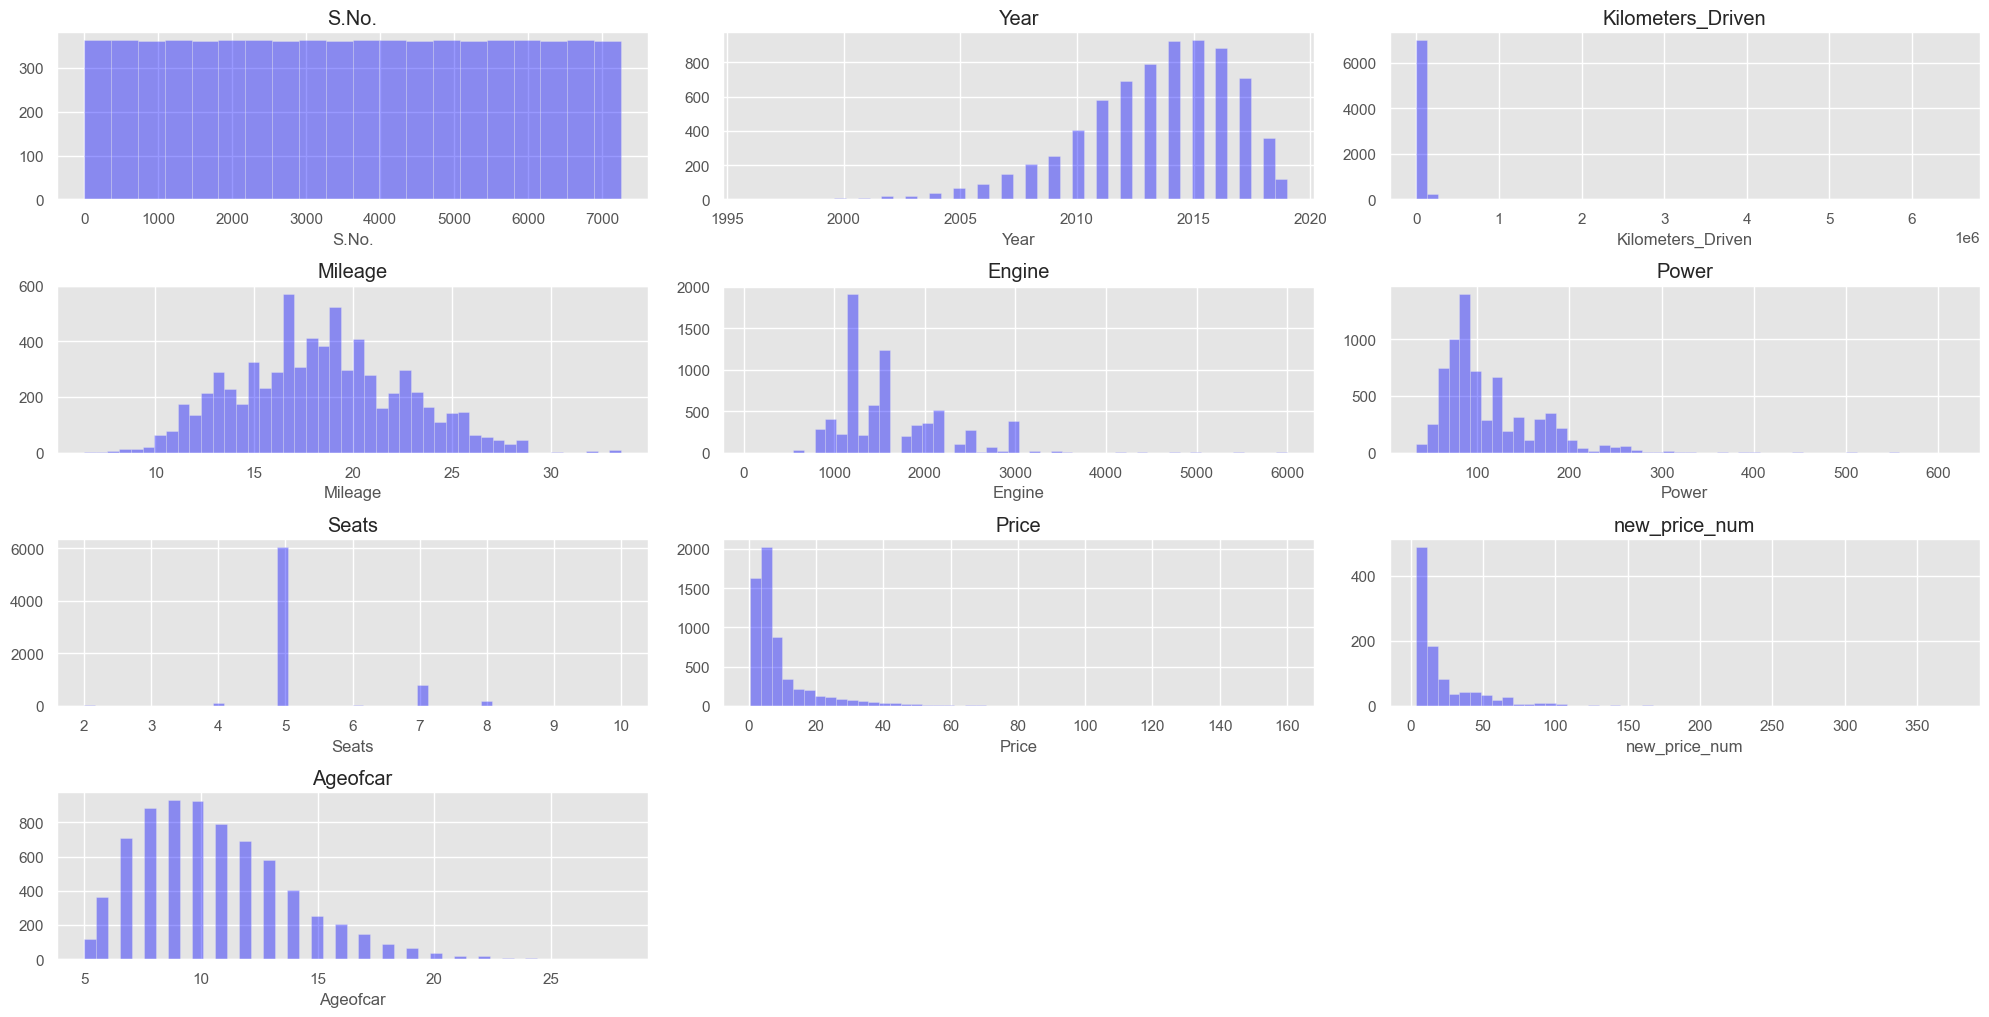

In [205]:
#GG-Plot: Grammer of Graphics Plot
plt.style.use('ggplot')
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)   
                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

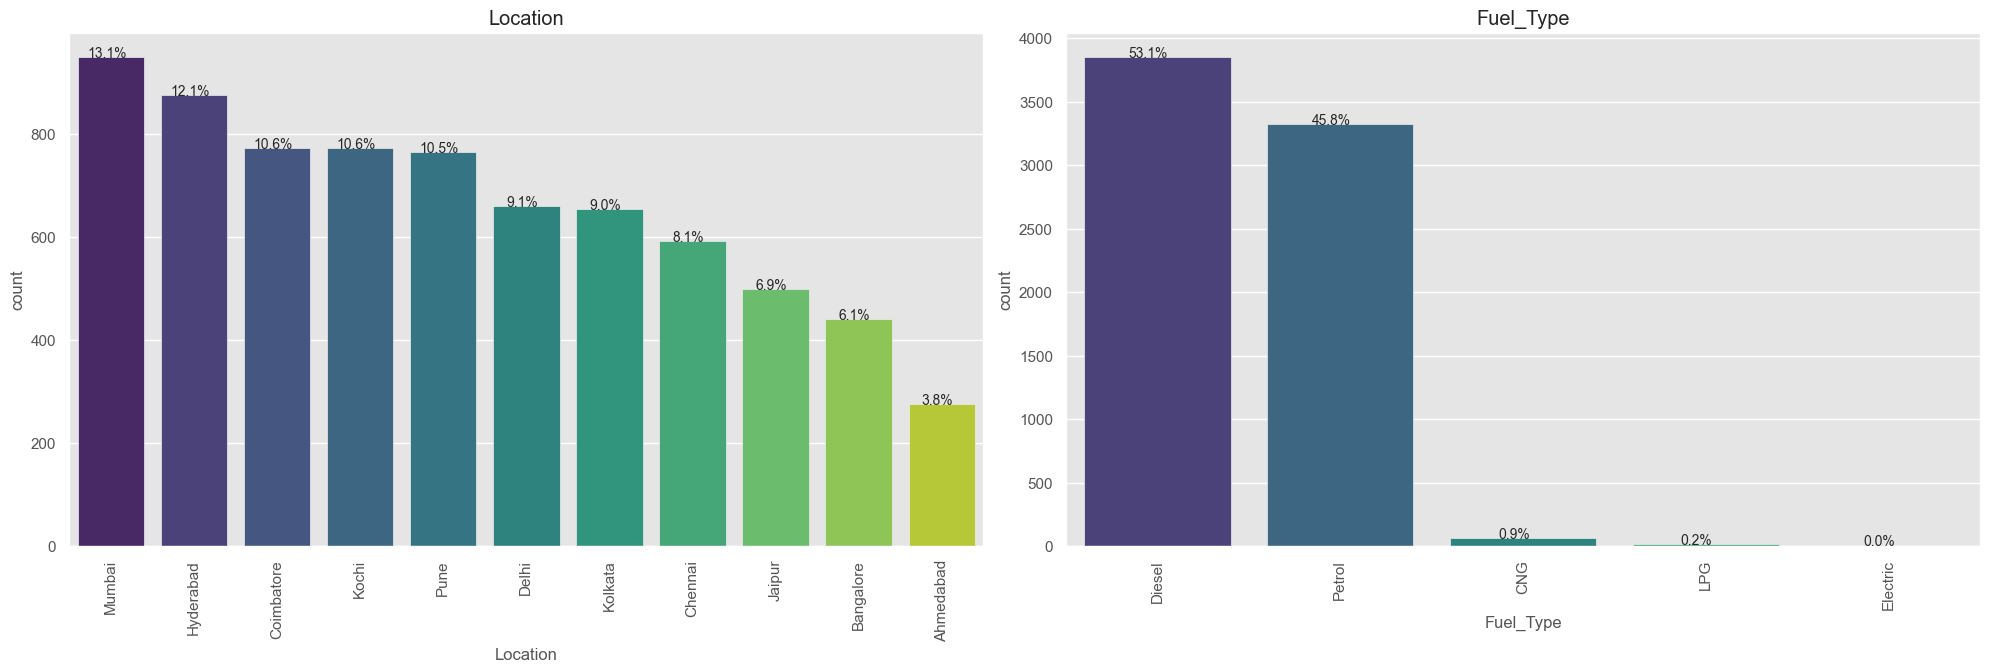

In [206]:
cat_columns=['Location','Fuel_Type']
plt.figure(figsize=(20,25))
for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

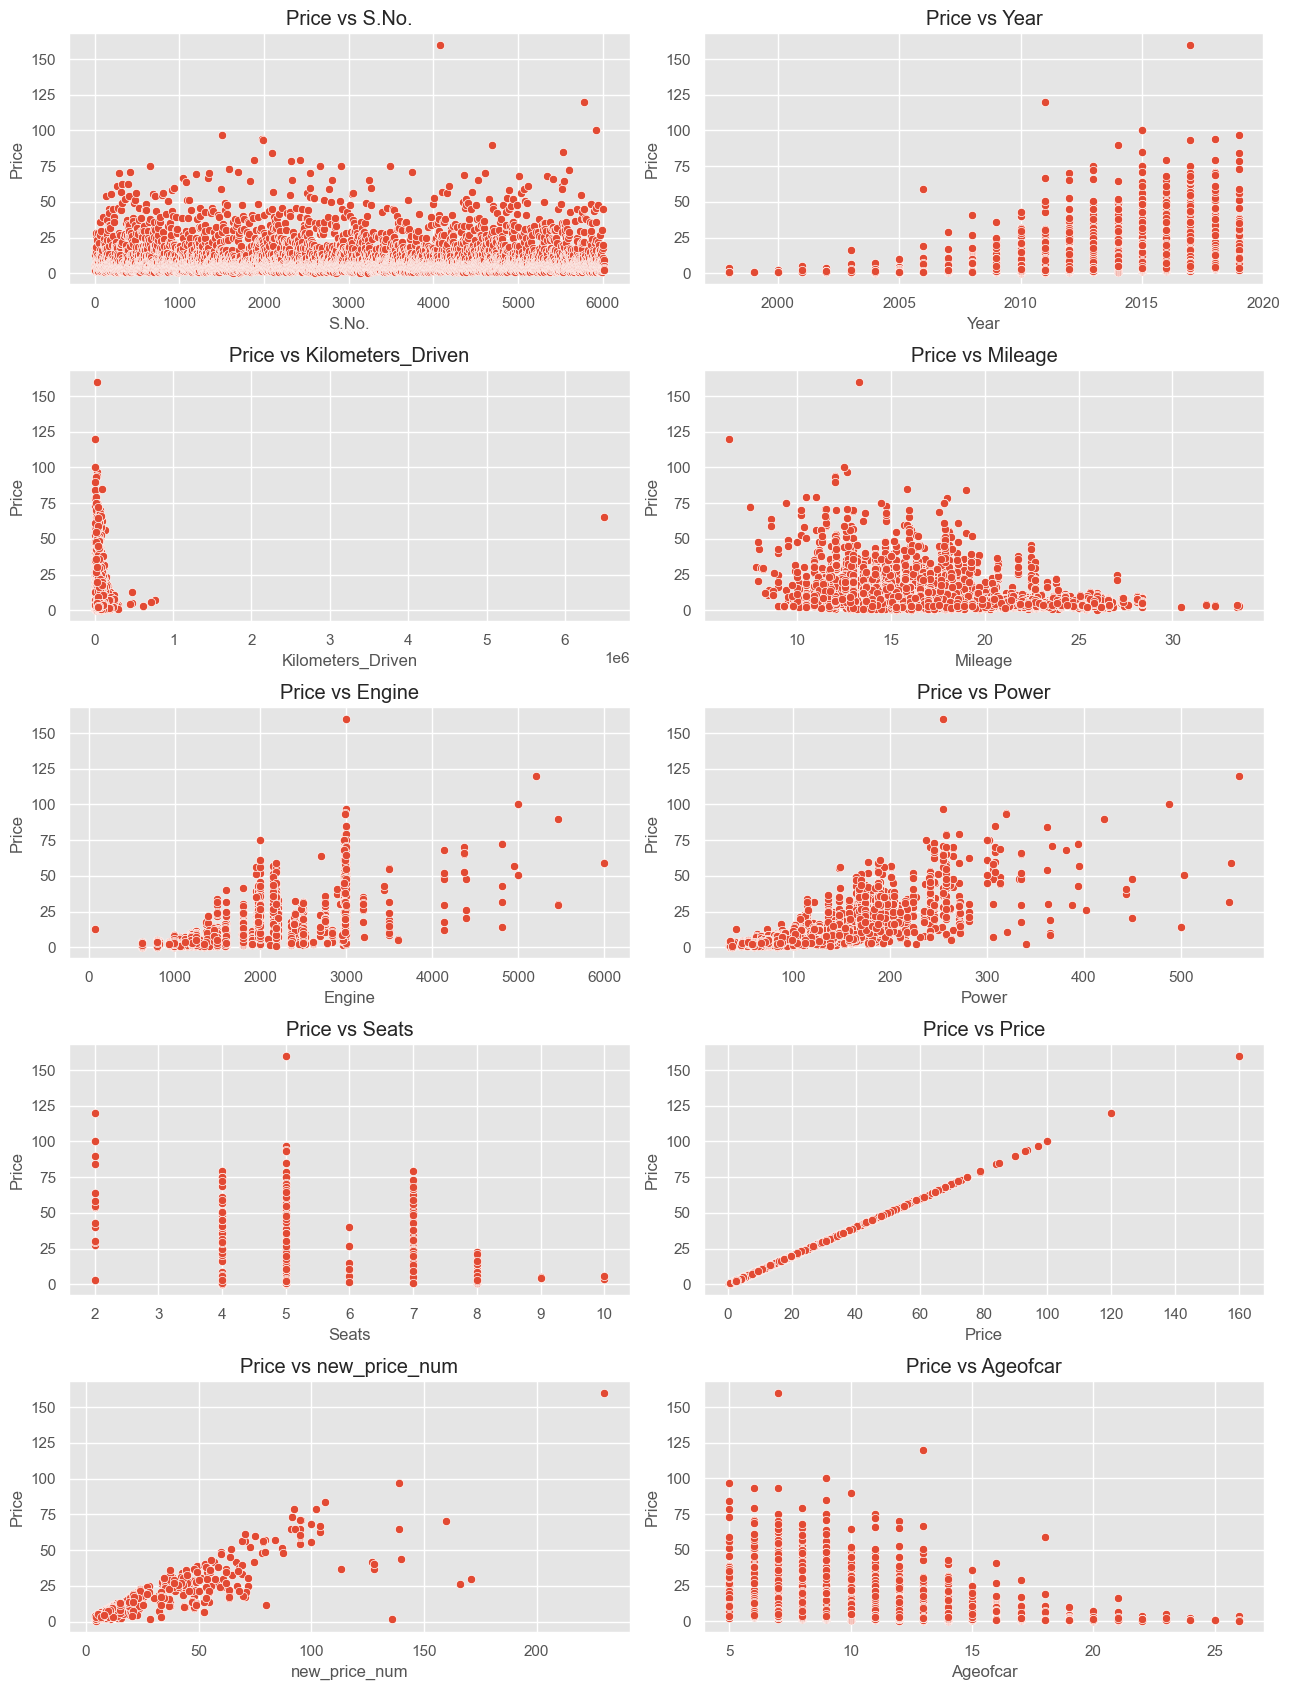

In [207]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))
for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

In [208]:
#HANDLING WITH THE MISSING VALUES
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [209]:
# counting the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()

2    5025
3    1112
0     819
1     187
4      57
5      31
6      20
7       1
Name: count, dtype: int64

In [210]:
#Investigating how many missing values per row are there for each variable
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("-" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n')

------------------------------ 
For the rows with exactly 1 missing values, NAs are found in:
Mileage      5
Price      182
dtype: int64


------------------------------ 
For the rows with exactly 2 missing values, NAs are found in:
New_Price        5025
new_price_num    5025
dtype: int64


------------------------------ 
For the rows with exactly 3 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
New_Price        1112
Price            1012
new_price_num    1112
dtype: int64


------------------------------ 
For the rows with exactly 4 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
New_Price        57
Price            23
new_price_num    57
dtype: int64


------------------------------ 
For the rows with exactly 5 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
New_Price        31
Price             6
new_price_num    31
dtyp

In [211]:
cars[num_missing==7]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
6633,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Mahindra,TUV300


In [212]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [213]:
#We can start filling missing values by grouping name and year and fill in missing values with median.
cars.groupby(['Name','Year'])['Engine'].median().head(15)

Name                                  Year
Ambassador Classic Nova Diesel        2003   1489.00000
Audi A3 35 TDI Attraction             2014   1968.00000
Audi A3 35 TDI Premium                2016   1968.00000
Audi A3 35 TDI Premium Plus           2015   1968.00000
                                      2016   1968.00000
Audi A3 35 TDI Technology             2017   1968.00000
Audi A4 1.8 TFSI                      2010   1781.00000
                                      2011   1781.00000
Audi A4 1.8 TFSI Technology Edition   2012   1798.00000
Audi A4 2.0 TDI                       2009   1968.00000
                                      2011   1968.00000
                                      2012   1968.00000
                                      2013   1968.00000
                                      2014   1968.00000
Audi A4 2.0 TDI 177 Bhp Premium Plus  2013   1968.00000
Name: Engine, dtype: float64

In [214]:
#Print the missing values
print("\nMissing values:")
print(cars.isna().sum())

# Compute median for each group using groupby and apply
def fill_na_with_median(group):
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(group):
        return group.fillna(group.median())
    return group

cars['Engine'] = cars.groupby(['Brand', 'Model'])['Engine'].transform(lambda x: fill_na_with_median(x))
cars['Power'] = cars.groupby(['Brand', 'Model'])['Power'].transform(lambda x: fill_na_with_median(x))
cars['Mileage'] = cars.groupby(['Brand', 'Model'])['Mileage'].transform(lambda x: fill_na_with_median(x))


Missing values:
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                83
Engine                 46
Power                 175
Seats                  54
New_Price            6246
Price                1233
new_price_num        6246
Ageofcar                0
Brand                   0
Model                   0
dtype: int64


In [215]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

In [216]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7252 non-null   int64   
 1   Name               7252 non-null   object  
 2   Location           7252 non-null   object  
 3   Year               7252 non-null   int64   
 4   Kilometers_Driven  7252 non-null   int64   
 5   Fuel_Type          7252 non-null   category
 6   Transmission       7252 non-null   category
 7   Owner_Type         7252 non-null   category
 8   Mileage            7220 non-null   float64 
 9   Engine             7234 non-null   float64 
 10  Power              7189 non-null   float64 
 11  Seats              7198 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
 14  new_price_num      1006 non-null   float64 
 15  Ageofcar           7252 non-null   int64   
 16  Brand      

In [217]:
#Grouping by the model and brand
cars.groupby(['Brand','Model'])['Engine'].median().head(5)

Brand       Model      
Ambassador  ClassicNova   1489.00000
Audi        A335          1968.00000
            A41.8         1781.00000
            A42.0         1968.00000
            A43.0         2967.00000
Name: Engine, dtype: float64

In [218]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model and year to get  more granularity / clarity and more accurate Engine and then fillig with median

In [219]:
cars['Engine']=cars.groupby(['Brand','Model'])['Engine'].transform(lambda x:x.fillna(x.median()))
cars['Power']=cars.groupby(['Brand','Model'])['Power'].transform(lambda x:x.fillna(x.median()))
cars['Mileage']=cars.groupby(['Brand','Model'])['Mileage'].transform(lambda x:x.fillna(x.median()))
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

In [220]:
result = cars.groupby(['Model', 'Year'])['Engine'].agg(['median', 'mean', 'max'])

# Sort by 'Model' in ascending order and get the top 10 rows

result_sorted = result.sort_values(by='Model', ascending=True).head(5)

In [221]:
cars.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(5)

median      mean       max
Brand      Engine                                  
Ambassador 1489.00000  35.50000  35.50000  35.50000
Audi       1395.00000 147.51000 147.51000 147.51000
           1781.00000 163.20000 163.20000 163.20000
           1798.00000 187.74000 181.03333 187.74000
           1968.00000 174.33000 167.12318 187.74000

In [222]:
#Checks for how many seat values are null

In [223]:
cars['Seats'].isnull().sum()

np.int64(54)

In [224]:
#lets solve it 
cars['Seats']=cars.groupby(['Name'])['Seats'].transform(lambda x:x.fillna(x.median()))
#checks again for the missing value count
cars['Seats'].isnull().sum()

np.int64(47)

In [225]:
#still some of them are there 
cars['Seats']=cars.groupby(['Model'])['Seats'].transform(lambda x:x.fillna(x.median()))
cars['Seats'].isnull().sum()

np.int64(23)

In [226]:
cars[cars['Seats'].isnull()==True].head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Ageofcar,Brand,Model
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,2.11000,NaN,14,Maruti,Swift1.3
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10000,NaN,NaN,NaN,NaN,1.75000,NaN,18,Maruti,Swift1.3
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10000,NaN,NaN,NaN,NaN,5.80000,NaN,9,Maruti,Swift1.3


In [227]:
#most of cars are 5 seater so fill rest of 23 by 5
cars['Seats']=cars['Seats'].fillna(5)
cars['Seats'].isnull().sum()

np.int64(0)

In [228]:
#Hence , we solved the issue
cars["Location"] = cars["Location"].astype("category")
cars['Brand'] =cars['Brand'].astype("category")

In [229]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7252 non-null   int64   
 1   Name               7252 non-null   object  
 2   Location           7252 non-null   category
 3   Year               7252 non-null   int64   
 4   Kilometers_Driven  7252 non-null   int64   
 5   Fuel_Type          7252 non-null   category
 6   Transmission       7252 non-null   category
 7   Owner_Type         7252 non-null   category
 8   Mileage            7220 non-null   float64 
 9   Engine             7234 non-null   float64 
 10  Power              7189 non-null   float64 
 11  Seats              7252 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
 14  new_price_num      1006 non-null   float64 
 15  Ageofcar           7252 non-null   int64   
 16  Brand      

In [230]:
#PROCESSING NEW PRICES
#For better granualarity grouping has there would be same car model present so filling with a median value brings it more near to real value
cars['new_price_num']=cars.groupby(['Name','Year'])['new_price_num'].transform(lambda x:x.fillna(x.median()))
cars.new_price_num.isnull().sum()

np.int64(6138)

In [231]:
cars['new_price_num']=cars.groupby(['Name'])['new_price_num'].transform(lambda x:x.fillna(x.median()))
cars.new_price_num.isnull().sum()

np.int64(6019)

In [232]:
cars['new_price_num']=cars.groupby(['Brand','Model'])['new_price_num'].transform(lambda x:x.fillna(x.median()))
cars.new_price_num.isnull().sum()

np.int64(4578)

In [233]:
cars['new_price_num']=cars.groupby(['Brand'])['new_price_num'].transform(lambda x:x.fillna(x.median()))
cars.drop(['New_Price'],axis=1,inplace=True)
cars.new_price_num.isnull().sum()

np.int64(158)

In [234]:
cars.groupby(['Brand'])['new_price_num'].median().sort_values(ascending=False)

Brand
Bentley         375.00000
Land Rover      139.00000
Porsche         136.00000
BMW              55.07000
Jaguar           53.72000
Audi             53.14000
Mercedes-Benz    49.49000
Volvo            45.67000
Mini Cooper      42.30000
Isuzu            33.68000
Mitsubishi       33.21000
Jeep             22.95000
Toyota           21.08500
Nissan           15.06000
Skoda            14.92250
Ford             11.47500
Renault          11.27000
Volkswagen       10.94000
Mahindra         10.90000
Honda             8.92000
Fiat              8.62500
Hyundai           8.23000
Tata              7.70000
Maruti            7.00000
Datsun            4.98000
Ambassador            NaN
Chevrolet             NaN
Force                 NaN
Hindustan             NaN
Lamborghini           NaN
Smart                 NaN
Name: new_price_num, dtype: float64

In [235]:
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                32
Engine                 18
Power                  63
Seats                   0
Price                1233
new_price_num         158
Ageofcar                0
Brand                   0
Model                   0
dtype: int64

In [236]:
cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    cars[ii] = cars[ii].fillna(cars[ii].median())

In [237]:
#dropping remaining rows
#cannot further fill this rows so dropping them
cars.dropna(inplace=True,axis=0)
cars.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [238]:
cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,1.75000,5.29000,14,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,12.50000,16.06000,9,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,4.50000,8.61000,13,Honda,JazzV


In [239]:
# Shape is used to determine the dimensions of the cars DataFrame.as [ rows, columns ]
cars.groupby(['Brand'])['Price'].agg({'median','mean','max'})

,mean,median,max
Brand,,,
Ambassador,NaN,NaN,NaN
Audi,25.53771,23.50000,72.94000
BMW,25.24315,21.00000,93.67000
Bentley,59.00000,59.00000,59.00000
Chevrolet,NaN,NaN,NaN
Datsun,3.04923,3.10000,3.95000
Fiat,3.26929,2.60000,7.71000
Force,NaN,NaN,NaN
Ford,6.88940,5.34500,56.80000


In [240]:
#using business knowledge to create class 
Low=['Maruti', 
     'Hyundai',
     'Ambassador',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi',
     'Honda']

High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']


In [241]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else: 
        return x

In [242]:
cars['Brand_Class'] = cars['Brand'].apply(lambda x: classrange(x))
cars['Brand_Class'].unique()

array(['Low', 'High'], dtype=object)

In [243]:
cars['Engine']=cars['Engine'].astype(int)
cars['Brand_Class']=cars["Brand_Class"].astype('category')
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5892 entries, 0 to 6017
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              5892 non-null   int64   
 1   Name               5892 non-null   object  
 2   Location           5892 non-null   category
 3   Year               5892 non-null   int64   
 4   Kilometers_Driven  5892 non-null   int64   
 5   Fuel_Type          5892 non-null   category
 6   Transmission       5892 non-null   category
 7   Owner_Type         5892 non-null   category
 8   Mileage            5892 non-null   float64 
 9   Engine             5892 non-null   int64   
 10  Power              5892 non-null   float64 
 11  Seats              5892 non-null   float64 
 12  Price              5892 non-null   float64 
 13  new_price_num      5892 non-null   float64 
 14  Ageofcar           5892 non-null   int64   
 15  Brand              5892 non-null   category
 16  Model      

In [244]:
# BIVARIATE AND MULTIVARIATE ANALYSIS

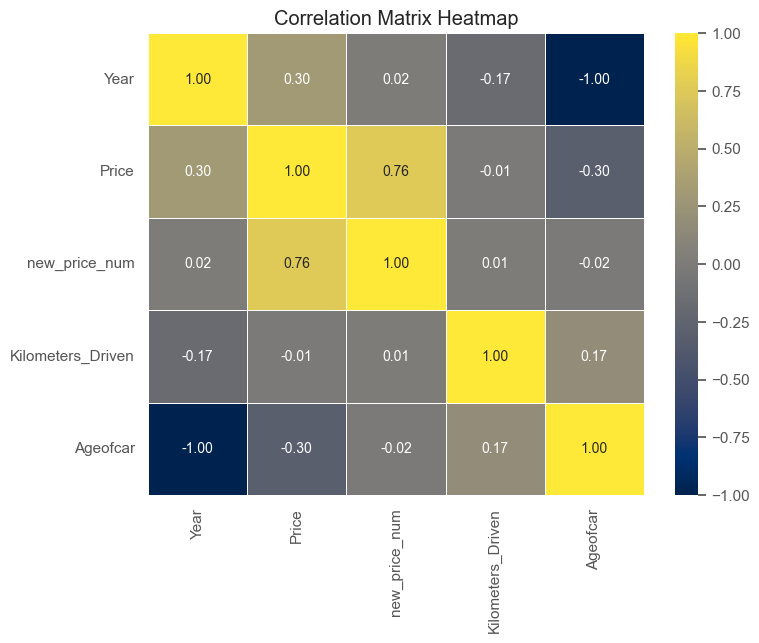

In [245]:
# Calculate the correlation matrix
numeric_columns = cars[['Year', 'Price', 'new_price_num','Kilometers_Driven','Ageofcar']]
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f",linewidths=0.4)
plt.title('Correlation Matrix Heatmap')
plt.show()

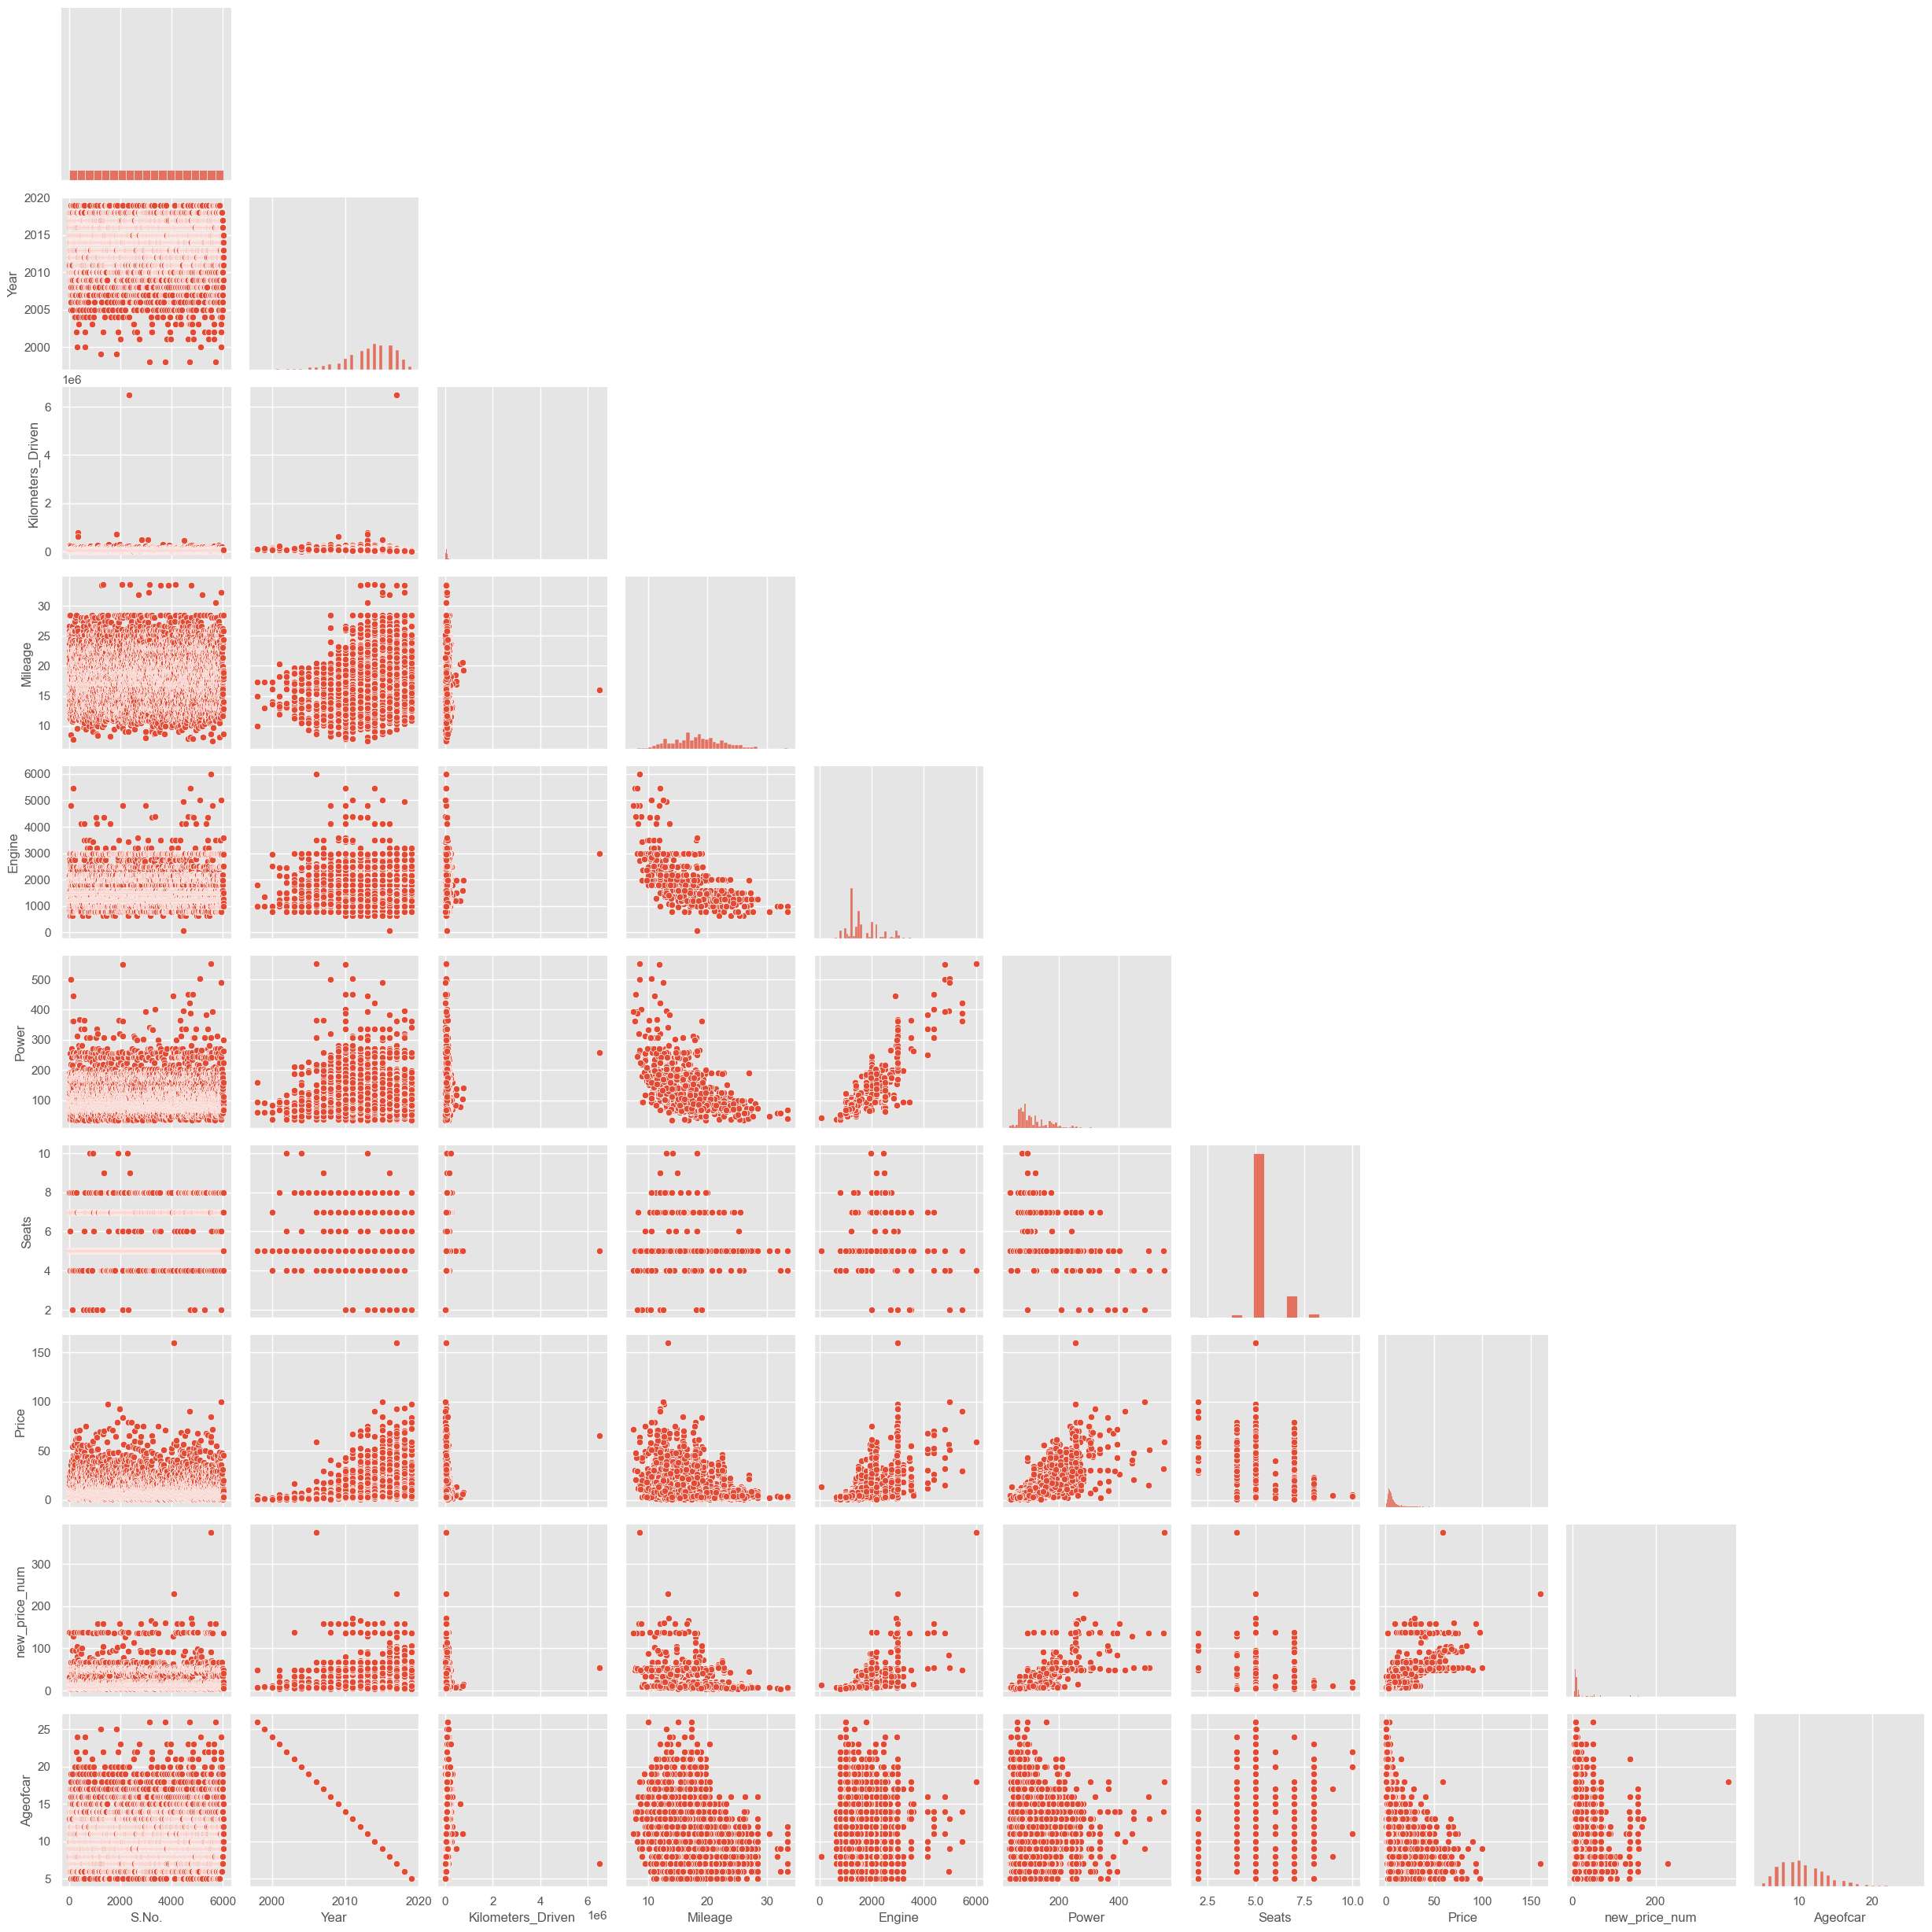

In [246]:
sns.pairplot(data=cars , corner=True)
plt.show()

In [247]:
#Variables that are correlated with Price variable
#Price Vs Engine Vs Transmission

<Axes: title={'center': 'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

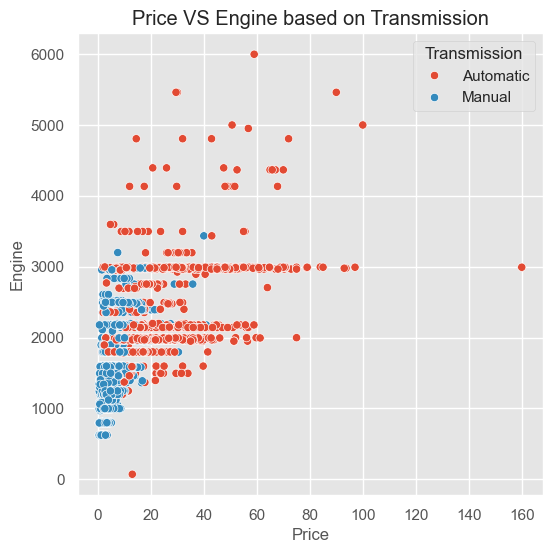

In [248]:
plt.figure(figsize=(6, 6))
plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=cars)

<Axes: title={'center': 'Price vs Mileage vs Transmission'}, xlabel='Price', ylabel='Mileage'>

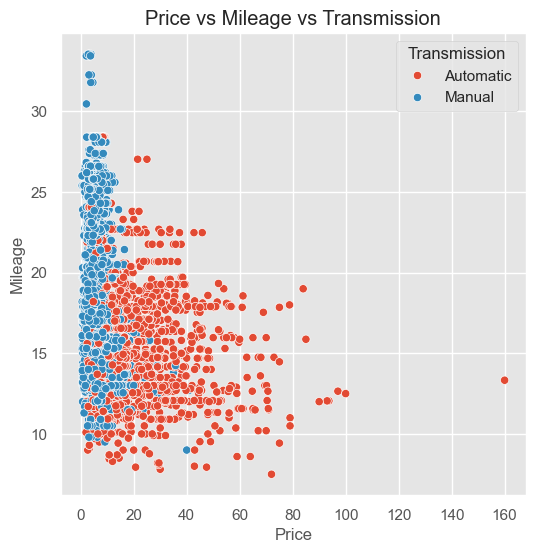

In [249]:
#Price Vs Mileage Vs Transmission
plt.figure(figsize=(6, 6))
plt.title("Price vs Mileage vs Transmission")
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=cars)

<Axes: title={'center': 'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

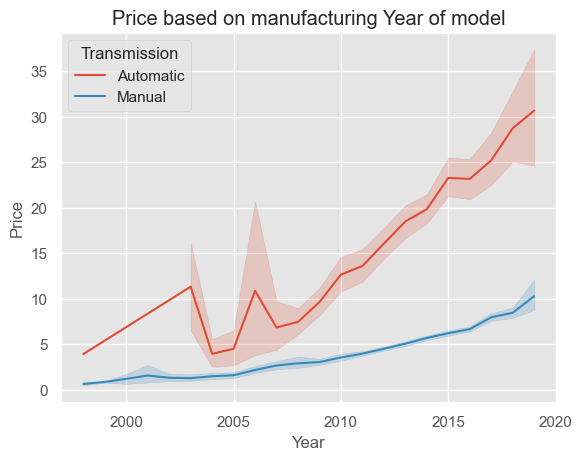

In [250]:
#Price Vs Year Vs Transmission
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',data=cars)

<Axes: title={'center': 'Price Vs Year VS FuelType'}, xlabel='Year', ylabel='Price'>

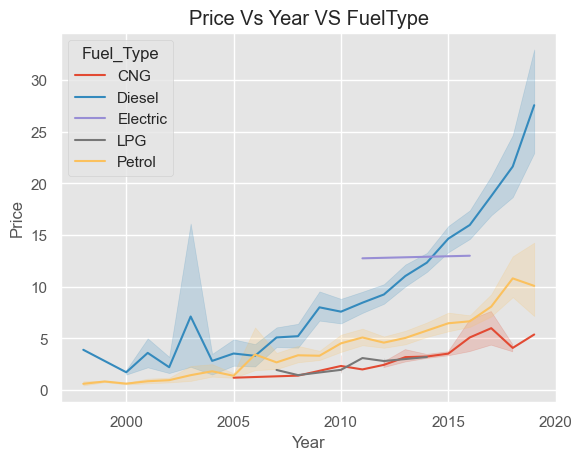

In [251]:
#Price Vs Year VS Fuel Type
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',data=cars)

<Axes: title={'center': 'Price Vs Year VS Owner_Type'}, xlabel='Year', ylabel='Price'>

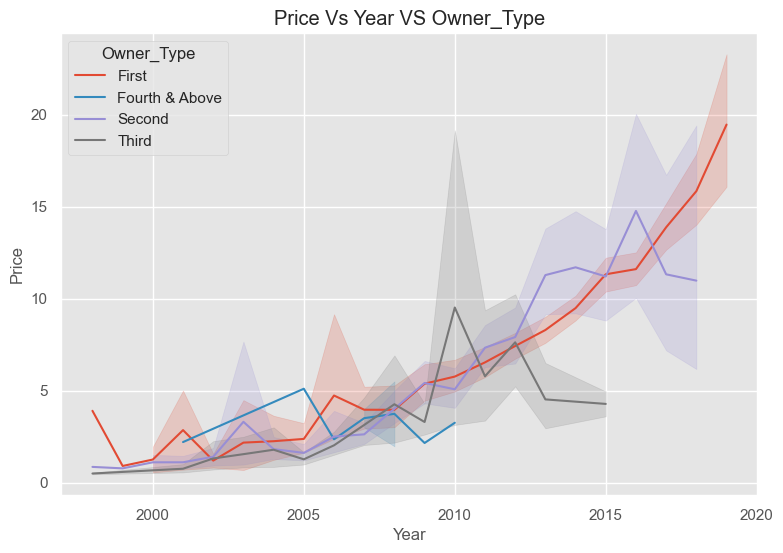

In [252]:
#Year Vs Price Vs Owner_Type
plt.figure(figsize=(9,6))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',data=cars)

<Axes: title={'center': 'Price Vs Mileage'}, xlabel='Mileage', ylabel='Price'>

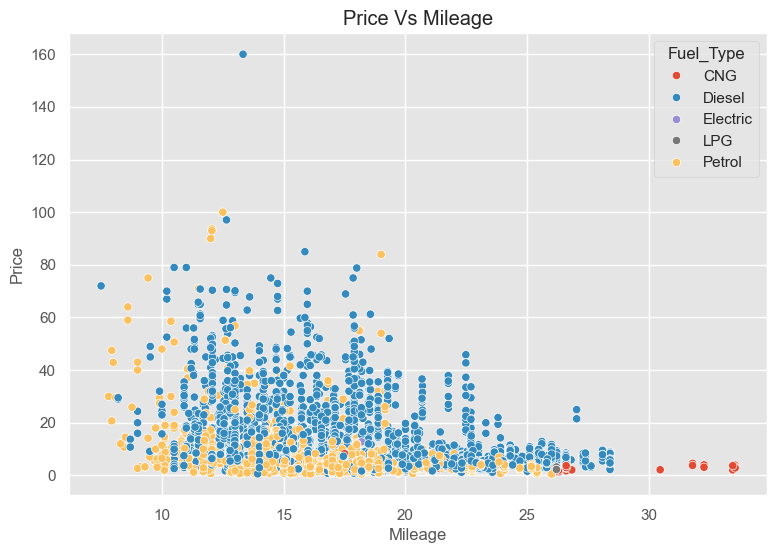

In [253]:
#Price Vs Mileage vs Fuel_type
# Understand relationships  between price and mileage
plt.figure(figsize=(9,6))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=cars)

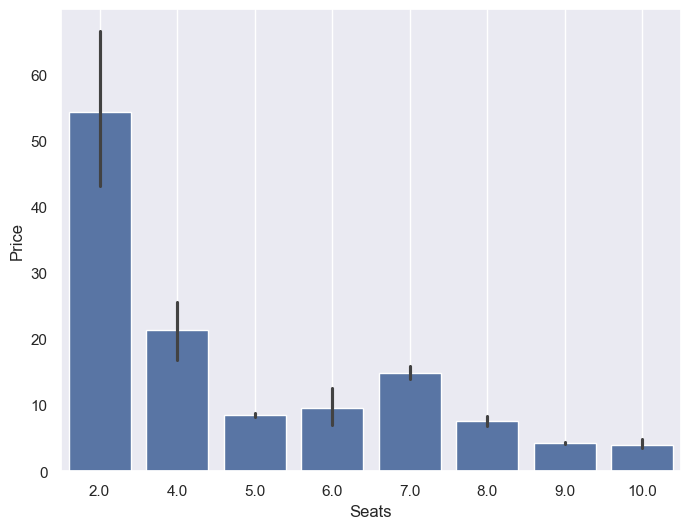

In [254]:
#Price Vs Seat
plt.figure(figsize=(8,6))
sns.set(font_scale=1)
sns.barplot(x='Seats', y='Price', data=cars)
plt.grid()

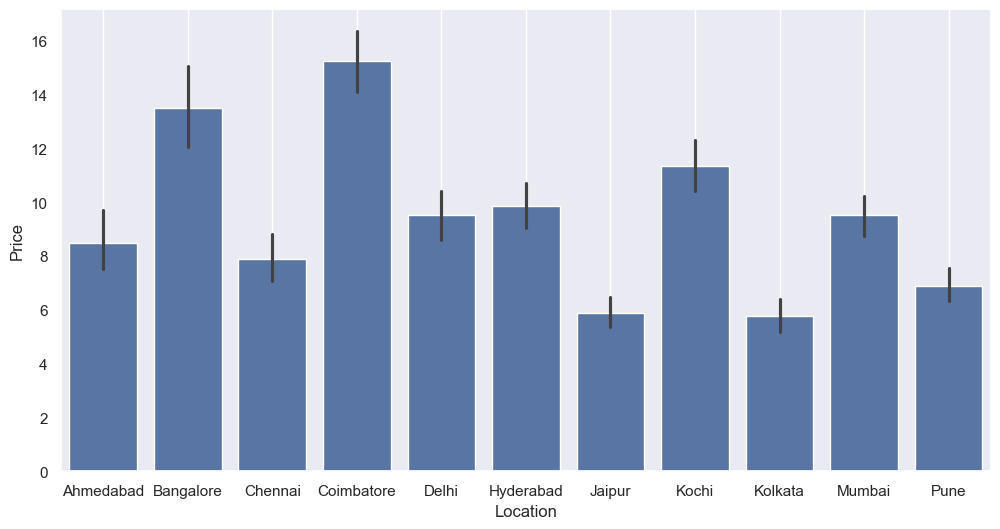

In [255]:
#Price Vs Location
#Price and Location 
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
sns.barplot(x='Location', y='Price', data=cars)
plt.grid()

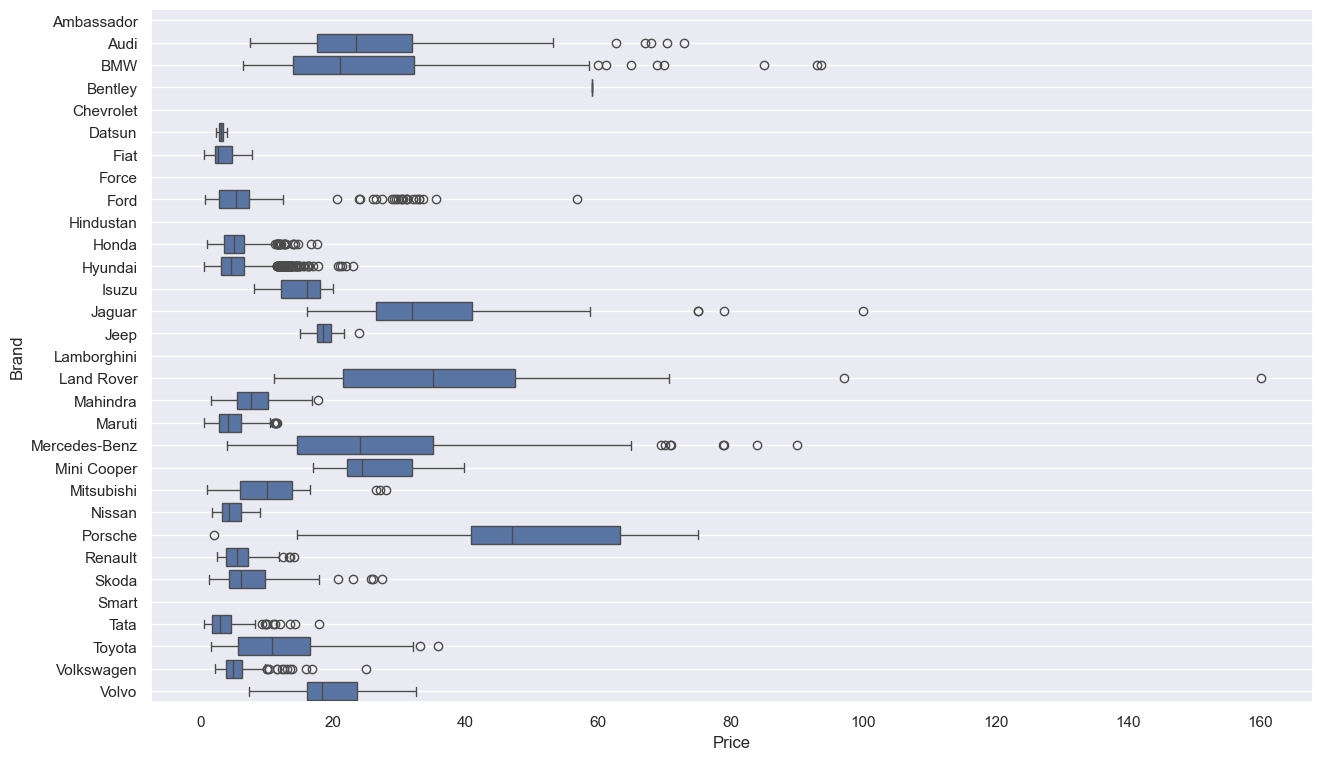

In [256]:
#Price Vs Brand
plt.figure(figsize=(15,9))
sns.set(font_scale=1)
sns.boxplot(x='Price', y='Brand', data=cars)
plt.grid()

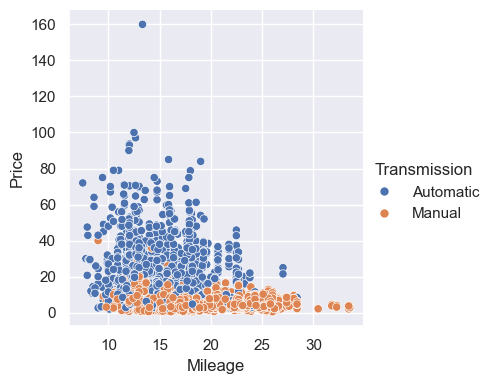

In [257]:
sns.relplot(data=cars, y='Price',x='Mileage',hue='Transmission',aspect=1,height=4)

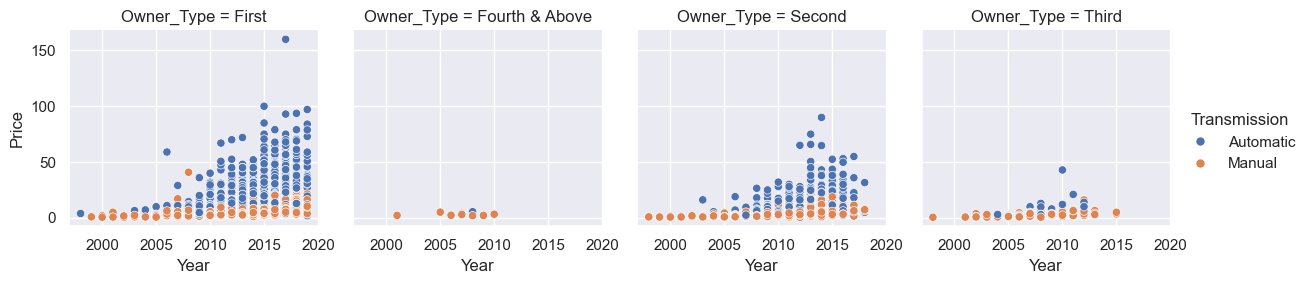

In [258]:
sns.relplot(data=cars, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=3)

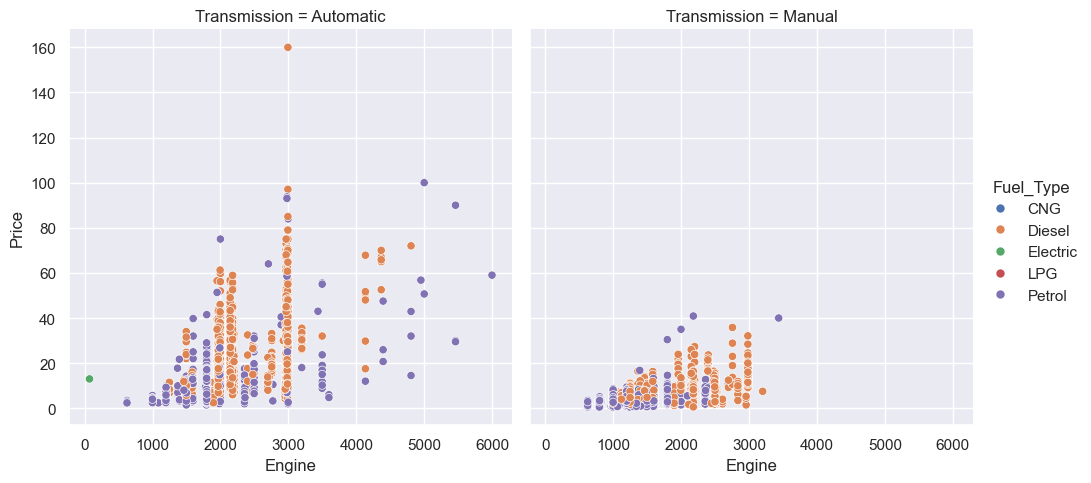

In [259]:
sns.relplot(data=cars, y='Price',x='Engine',col='Transmission',aspect=1,height=5,hue="Fuel_Type")

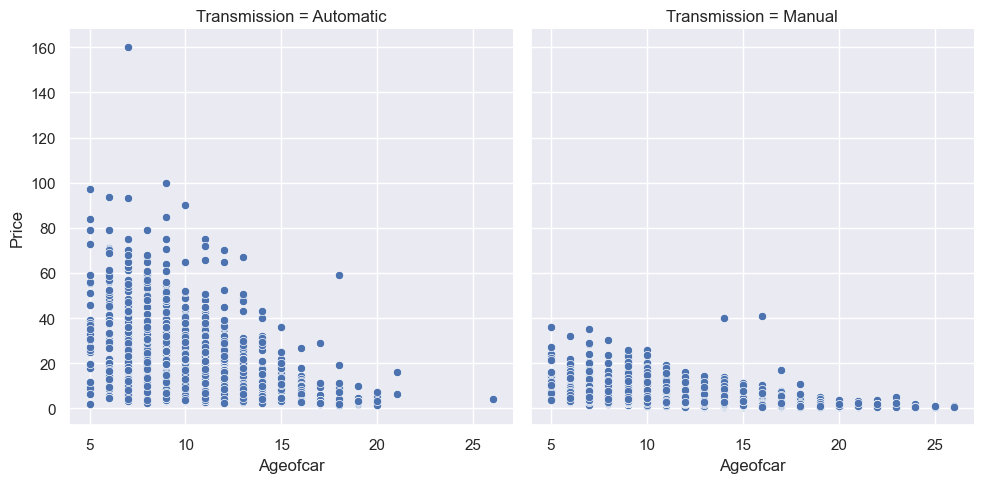

In [260]:
sns.relplot(data=cars, y='Price',x='Ageofcar',col='Transmission',aspect=1,height=5)

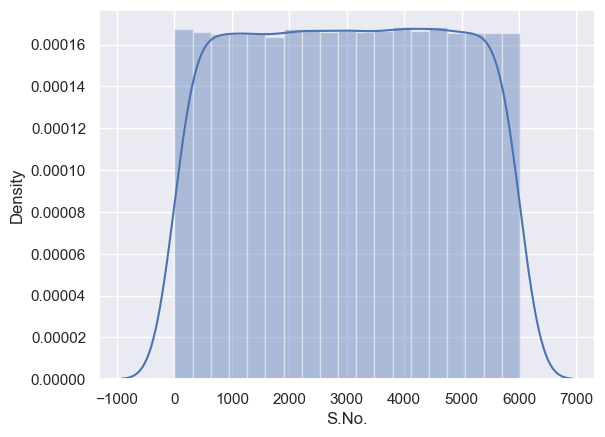

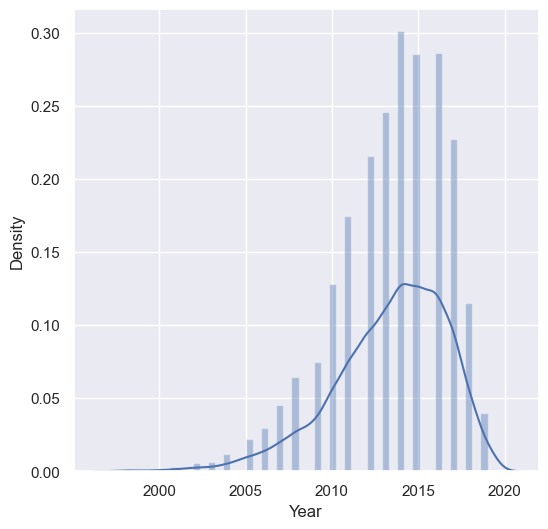

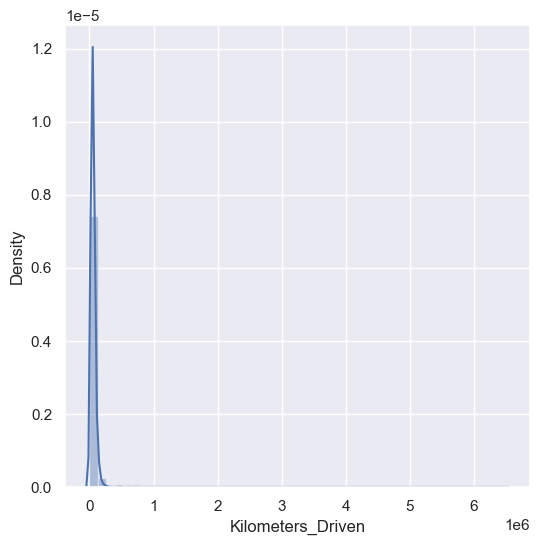

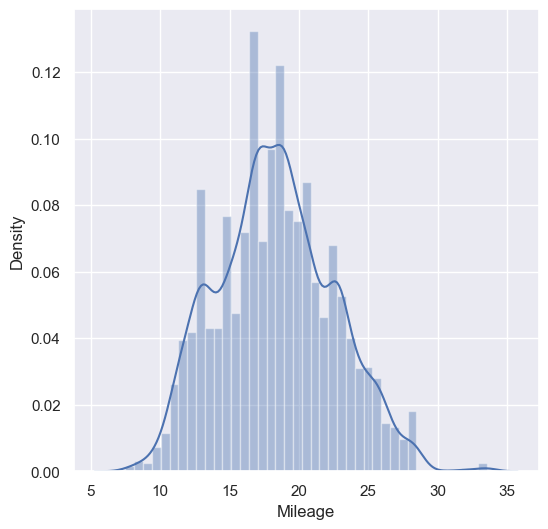

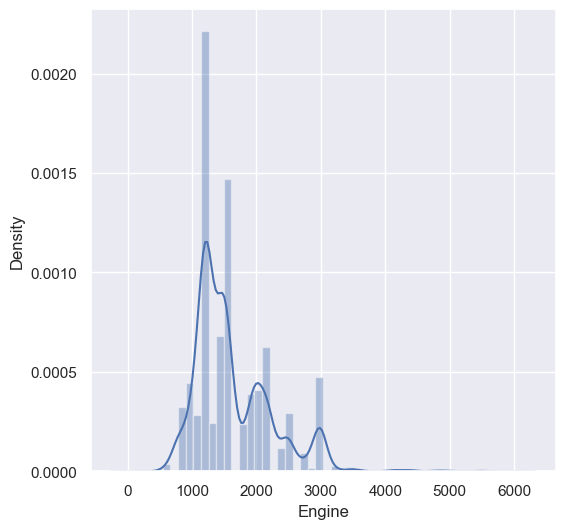

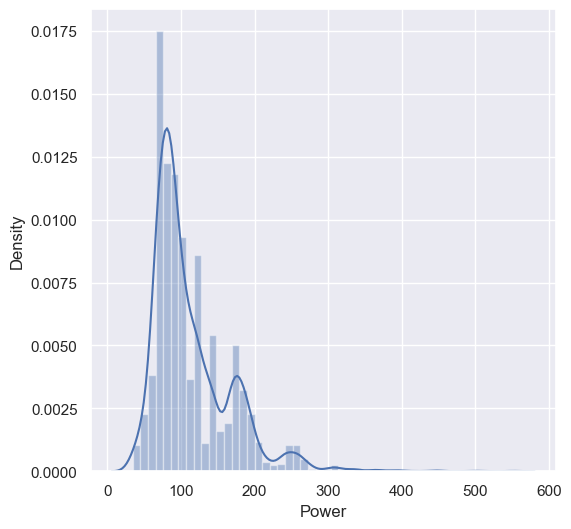

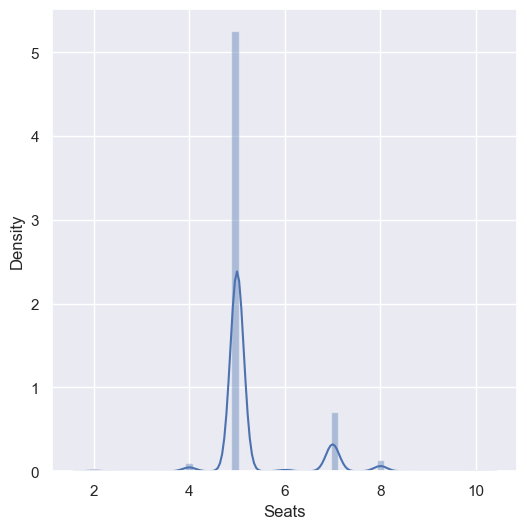

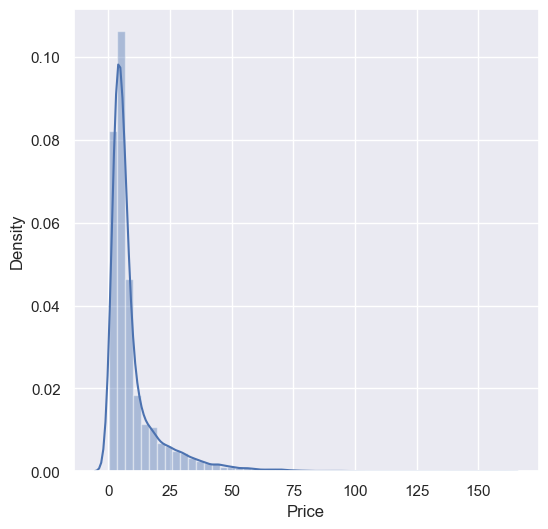

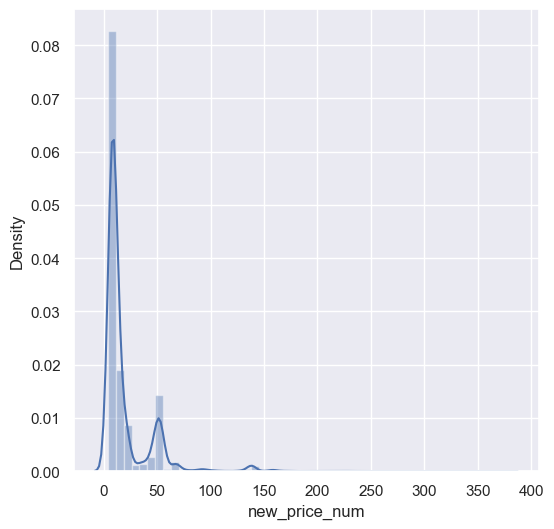

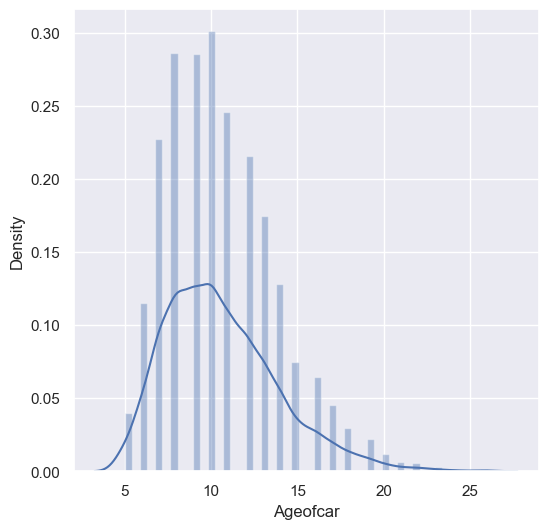

<Figure size 600x600 with 0 Axes>

In [261]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = cars.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(cars[colname], kde=True)
    plt.show()
    plt.figure(figsize=(6,6))

In [262]:
#Distrubtions are right skewed , using Log transform can help in normalization
def Perform_log_transform(cars,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        cars[colname + '_log'] = np.log(cars[colname])
    cars.info()

In [263]:
#This needs to be done before the data is split
Perform_log_transform(cars,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 5892 entries, 0 to 6017
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   S.No.                  5892 non-null   int64   
 1   Name                   5892 non-null   object  
 2   Location               5892 non-null   category
 3   Year                   5892 non-null   int64   
 4   Kilometers_Driven      5892 non-null   int64   
 5   Fuel_Type              5892 non-null   category
 6   Transmission           5892 non-null   category
 7   Owner_Type             5892 non-null   category
 8   Mileage                5892 non-null   float64 
 9   Engine                 5892 non-null   int64   
 10  Power                  5892 non-null   float64 
 11  Seats                  5892 non-null   float64 
 12  Price                  5892 non-null   float64 
 13  new_price_num          5892 non-null   float64 
 14  Ageofcar               5892 non-null   int64 

In [264]:
cars.select_dtypes(include=['object','category']).columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model', 'Brand_Class'],
      dtype='object')

In [265]:
label_encoder = LabelEncoder()
# Convert the categorical columns to numerical using LabelEncoder
cars['Name'] = label_encoder.fit_transform(cars['Name'])
cars['Location'] = label_encoder.fit_transform(cars['Location'])
cars['Owner_Type'] = label_encoder.fit_transform(cars['Owner_Type'])
cars['Brand'] = label_encoder.fit_transform(cars['Brand'])
cars['Fuel_Type'] = label_encoder.fit_transform(cars['Fuel_Type'])
cars['Transmission'] = label_encoder.fit_transform(cars['Transmission'])
cars['Model'] = label_encoder.fit_transform(cars['Model'])
cars['Brand_Class'] = label_encoder.fit_transform(cars['Brand_Class'])
cars.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Ageofcar,Brand,Model,Brand_Class,Kilometers_Driven_log,Price_log
0,0,1153,9,2010,72000,0,1,0,26.60000,998,58.16000,5.00000,1.75000,5.29000,14,13,590,1,11.18442,0.55962
1,1,466,10,2015,41000,1,1,0,19.67000,1582,126.20000,5.00000,12.50000,16.06000,9,7,154,1,10.62133,2.52573
2,2,440,2,2011,46000,4,1,0,18.20000,1199,88.70000,5.00000,4.50000,8.61000,13,6,308,1,10.73640,1.50408


In [266]:
X = cars.drop('new_price_num', axis=1)
y = cars['new_price_num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=35)

In [267]:
cars= pd.DataFrame(cars)

# Replace empty strings with NaN
cars.replace('', np.nan, inplace=True)

# Convert columns to float where applicable
cars= cars.transform(pd.to_numeric, errors='ignore')

In [268]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [269]:
#MODEL BUILDING

In [270]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)

# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_reg.predict(X_test_scaled)

# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100,
random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_reg.predict(X_test_scaled)

# XGBoost Regressor
xgboost_reg = xgb.XGBRegressor(objective ='reg:squarederror',colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators= 100, 
                               random_state=42)
xgboost_reg.fit(X_train_scaled, y_train)
xgboost_predictions = xgboost_reg.predict(X_test_scaled)

# MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000,
random_state=42)
mlp_reg.fit(X_train_scaled, y_train)
mlp_predictions = mlp_reg.predict(X_test_scaled)

In [271]:
#MODEL EVALUATION

In [272]:
models = {'Linear Regression': linear_reg,'Decision Tree Regressor':decision_tree_reg,'Random Forest Regressor': random_forest_reg, 
          'XGBoost Regressor': xgboost_reg,'MLP Regressor': mlp_reg}

for name, model in models.items():
 predictions = model.predict(X_test_scaled)
 mse = mean_squared_error(y_test, predictions)
 r2 = r2_score(y_test, predictions)
 print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')

Linear Regression - Mean Squared Error: 118.61861698923931, R-squared: 0.7598505988360126
Decision Tree Regressor - Mean Squared Error: 46.73429055343511, R-squared: 0.9053840604864802
Random Forest Regressor - Mean Squared Error: 17.353666583141962, R-squared: 0.9648666225950089
XGBoost Regressor - Mean Squared Error: 26.36329818400223, R-squared: 0.946626166850604
MLP Regressor - Mean Squared Error: 58.1463971687818, R-squared: 0.8822796723283911


In [273]:
#GRAPHICAL REPRESENTATION

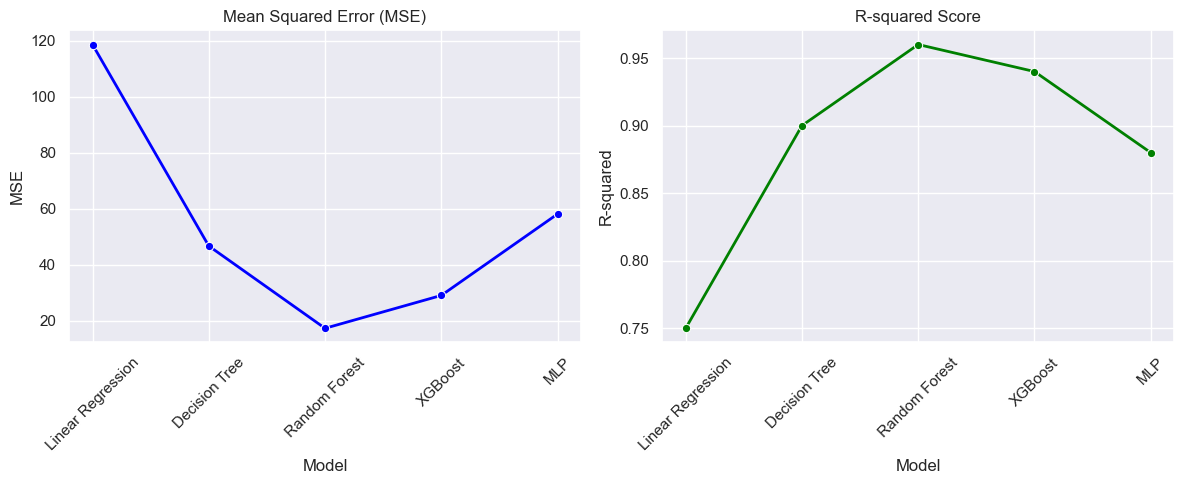

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models and their corresponding MSE and R² scores
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'MLP']
mse_scores = [118.61, 46.73, 17.35, 29.08, 58.14]
r2_scores = [0.75, 0.90, 0.96, 0.94, 0.88]

# Create a DataFrame for easy plotting
performance_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'R-squared': r2_scores})

# Plotting
plt.figure(figsize=(12, 5))

# Line plot for MSE
plt.subplot(1, 2, 1)
sns.lineplot(x='Model', y='MSE', data=performance_df, marker='o', color='blue', linewidth=2)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Line plot for R-squared
plt.subplot(1, 2, 2)
sns.lineplot(x='Model', y='R-squared', data=performance_df, marker='o', color='green', linewidth=2)
plt.title('R-squared Score')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [275]:
#MODEL ACCURACY

In [276]:
from sklearn.ensemble import RandomForestClassifier
# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 96.67%


In [277]:
#CROSS VALIDATION

In [278]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")

Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.97


In [279]:
# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize a Decision Tree classifier
classifier = RandomForestClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Model Precision: {precision * 100:.2f}%")
print(f"Model Recall: {recall * 100:.2f}%")
print(f"Model F1-Score: {f1 * 100:.2f}%")

# Alternatively, print a full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Model Accuracy: 96.67%
Model Precision: 97.14%
Model Recall: 96.67%
Model F1-Score: 96.73%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [280]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30]         # Maximum depth of trees
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
